In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_train.id.nunique()

159571

In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('Number of null values::', df_train['comment_text'].isnull().sum())

Number of null values:: 0


In [7]:
df_train['non-unique'] = np.where((df_train['malignant'] & df_train['highly_malignant'] == 1) | 
                                 (df_train['malignant'] & df_train['rude'] == 1) | 
                                 (df_train['malignant'] & df_train['threat'] == 1) | 
                                 (df_train['malignant'] & df_train['abuse'] == 1) | 
                                 (df_train['malignant'] & df_train['loathe'] == 1) | 
                                 (df_train['highly_malignant'] & df_train['rude'] == 1) | 
                                 (df_train['highly_malignant'] & df_train['threat'] == 1) | 
                                 (df_train['highly_malignant'] & df_train['abuse'] == 1) | 
                                 (df_train['highly_malignant'] & df_train['loathe'] == 1) | 
                                 (df_train['rude'] & df_train['threat'] == 1) | 
                                 (df_train['rude'] & df_train['abuse'] == 1) | 
                                 (df_train['rude'] & df_train['loathe'] == 1) | 
                                 (df_train['threat'] & df_train['loathe'] == 1) | 
                                 (df_train['threat'] & df_train['abuse'] == 1) | 
                                 (df_train['abuse'] & df_train['loathe'] == 1), 1, 0)
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,non-unique
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [8]:
df_train['non-unique'].value_counts()

0    149706
1      9865
Name: non-unique, dtype: int64

In [10]:
df_train[df_train['non-unique']==1]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,non-unique
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,1
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,1
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,1
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,1


In [11]:
df = df_train.copy()
df.shape

(159571, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   non-unique        159571 non-null  int32 
dtypes: int32(1), int64(6), object(2)
memory usage: 10.3+ MB


In [13]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [14]:
df['comment_text'][5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [15]:
df['org_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,non-unique,org_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


In [16]:
def clean_text(df, df_column_name):
  # Convert all messages to lower case
  df[df_column_name] = df[df_column_name].str.lower()

  # Replace email addresses with 'email'
  df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                  'emailaddress')

  # Replace URLs with 'webaddress'
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                    'webaddress')

  # Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
  # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
  df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                    'phonenumber')

  # Replace numbers with 'numbr'
  df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

  # Remove punctuation
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

  # Replace whitespace between terms with a single space
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

  # Remove leading and trailing whitespace
  df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')

  # Remove stopwords
  stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
  df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [17]:
clean_text(df, 'comment_text')
df['comment_text'][5]

'congratulations well use tools well talk'

In [18]:
df['new_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,non-unique,org_length,new_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,170
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,0,112,93
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


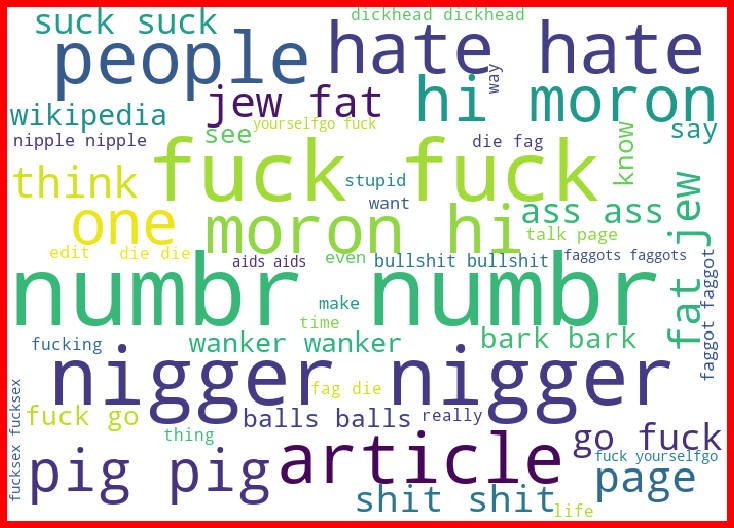

In [19]:
#Getting sense of loud words in malignant 
from wordcloud import WordCloud

malignant = df['comment_text'][df['malignant']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

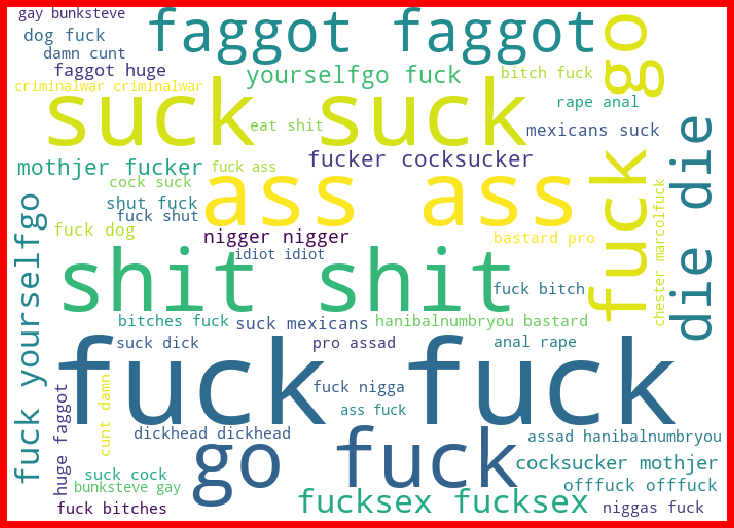

In [20]:
highly_malignant = df['comment_text'][df['highly_malignant']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(highly_malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

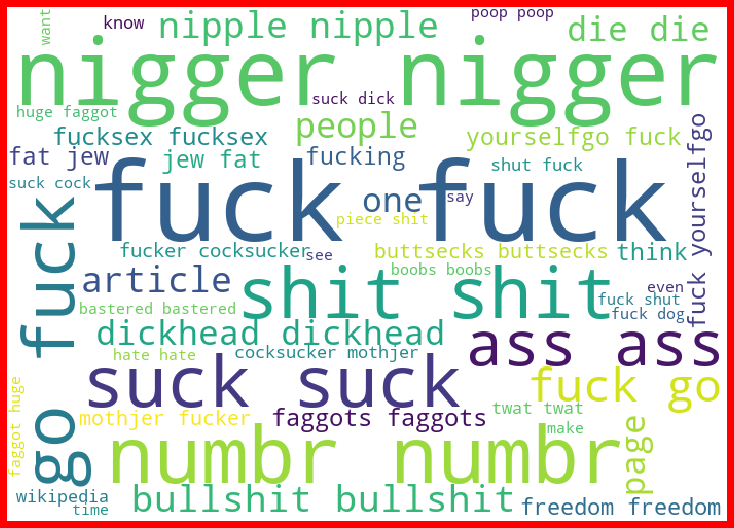

In [21]:
rude = df['comment_text'][df['rude']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(rude))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

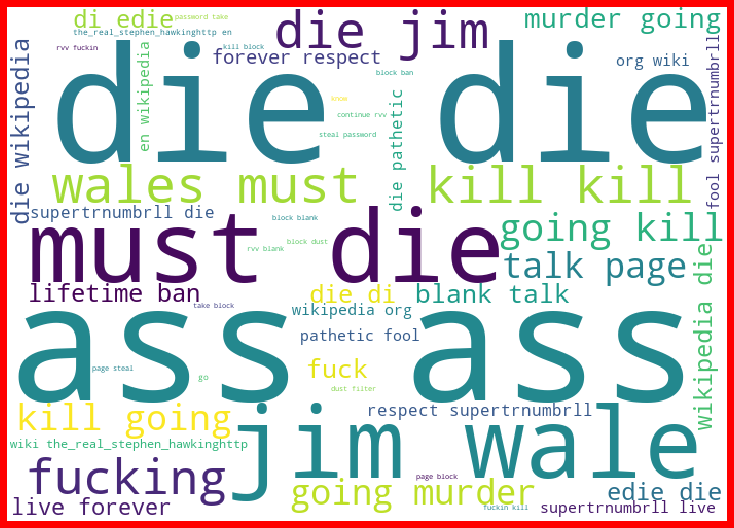

In [22]:
threat = df['comment_text'][df['threat']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(threat))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

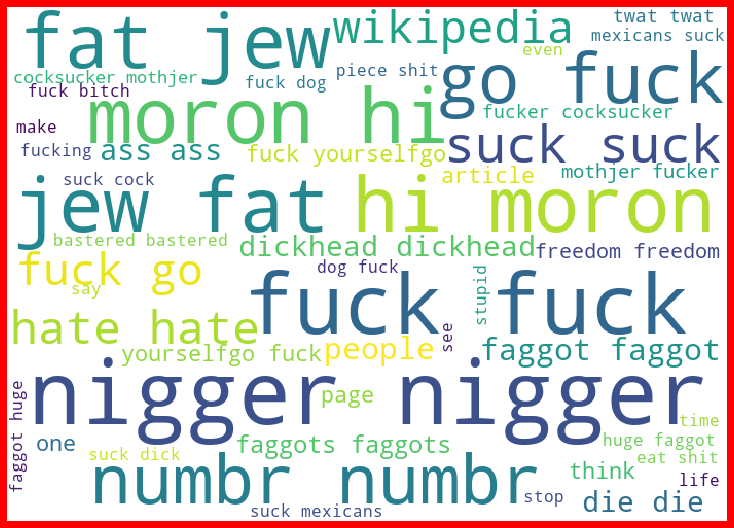

In [23]:
abuse = df['comment_text'][df['abuse']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(abuse))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

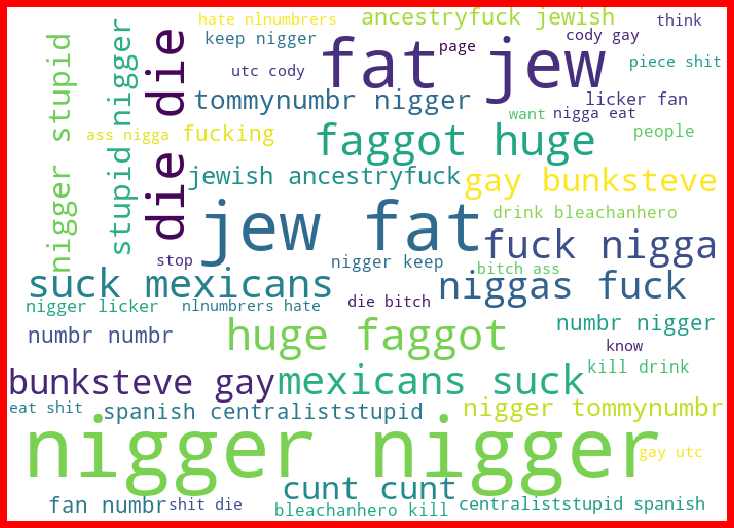

In [24]:
loathe = df['comment_text'][df['loathe']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(loathe))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

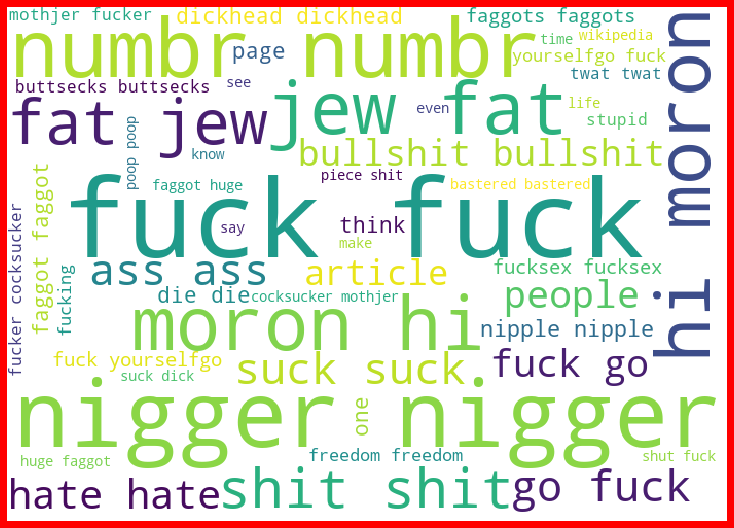

In [25]:
# Generate word cloud for rows that has more than one classifiaction
non_unique = df['comment_text'][df['non-unique']==1]

word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(non_unique))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

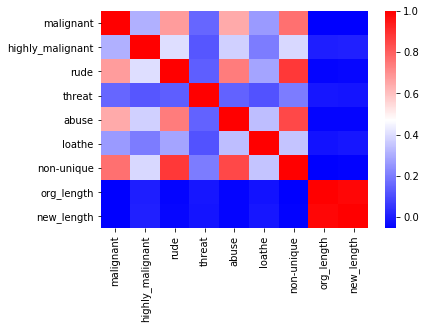

In [26]:
sns.heatmap(df.corr(), cmap='bwr')

In [27]:
df.drop(columns=['org_length'], inplace=True)

In [28]:
# dropping id and comment text
df_toxic = df.drop(columns=['id', 'comment_text', 'non-unique', 'new_length'])
# Calculating total count of each category comments
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['Category', 'Count'])
df_stats

,Category,Count
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


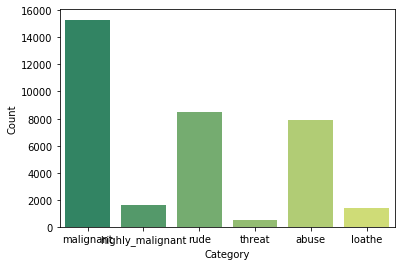

In [29]:
sns.barplot(x='Category', y='Count', data=df_stats, palette='summer')

In [30]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,non-unique,new_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,170
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,0,93
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,0,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,29


In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42, shuffle=True)

In [32]:
train.shape, test.shape

((106912, 10), (52659, 10))

In [33]:
x_train = train['comment_text']
y_train = train.drop(columns=['comment_text', 'id', 'non-unique', 'new_length'])
x_test = test['comment_text']
y_test = test.drop(columns=['comment_text', 'id', 'non-unique', 'new_length'])

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
cv = CountVectorizer()
tf = TfidfTransformer()

x_train = tf.fit_transform(cv.fit_transform(x_train))
x_test = tf.transform(cv.transform(x_test))

In [35]:
y_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
accuracy = [[], [], [], [], []]

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

for i in y_labels:
  mnb.fit(x_train, train[i])
  acc = mnb.score(x_test, test[i])
  accuracy[0].append(acc)
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 92.03%
highly_malignant accuracy :: 99.0%
rude accuracy :: 95.21%
threat accuracy :: 99.71%
abuse accuracy :: 95.19%
loathe accuracy :: 99.1%


In [37]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

for i in y_labels:
  sv.fit(x_train, train[i])
  acc = sv.score(x_test, test[i])
  accuracy[1].append(acc)
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 96.02%
highly_malignant accuracy :: 99.06%
rude accuracy :: 97.88%
threat accuracy :: 99.75%
abuse accuracy :: 97.13%
loathe accuracy :: 99.2%


In [38]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

for i in y_labels:
  logr.fit(x_train, train[i])
  acc = logr.score(x_test, test[i])
  accuracy[2].append(acc)
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 95.5%
highly_malignant accuracy :: 99.1%
rude accuracy :: 97.62%
threat accuracy :: 99.74%
abuse accuracy :: 96.89%
loathe accuracy :: 99.18%


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

for i in y_labels:
  dtc.fit(x_train, train[i])
  acc = dtc.score(x_test, test[i])
  accuracy[3].append(acc)
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 94.0%
highly_malignant accuracy :: 98.68%
rude accuracy :: 97.51%
threat accuracy :: 99.63%
abuse accuracy :: 96.23%
loathe accuracy :: 98.98%


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = DecisionTreeClassifier()

for i in y_labels:
  knn.fit(x_train, train[i])
  acc = knn.score(x_test, test[i])
  accuracy[4].append(acc)
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 93.99%
highly_malignant accuracy :: 98.7%
rude accuracy :: 97.49%
threat accuracy :: 99.64%
abuse accuracy :: 96.15%
loathe accuracy :: 99.01%


In [41]:
print(accuracy)

[[0.9203175145749065, 0.9899922140564765, 0.9520689720655539, 0.9971324939706413, 0.9518980611101616, 0.9910366698949847], [0.960177747393608, 0.9906188875595815, 0.9787690613190527, 0.9974933059875805, 0.971324939706413, 0.9920051653088741], [0.9550124385195313, 0.9910366698949847, 0.9761674167758598, 0.9973603752444976, 0.9689321863309216, 0.9917962741411724], [0.9400102546573236, 0.9868208663286427, 0.9750849807250422, 0.9962779391936801, 0.9622666590706243, 0.9897643327826202], [0.9399153041265501, 0.9869537970717256, 0.9748760895573406, 0.9963728897244536, 0.9615450350367458, 0.99008716458725]]


<function matplotlib.pyplot.show(*args, **kw)>

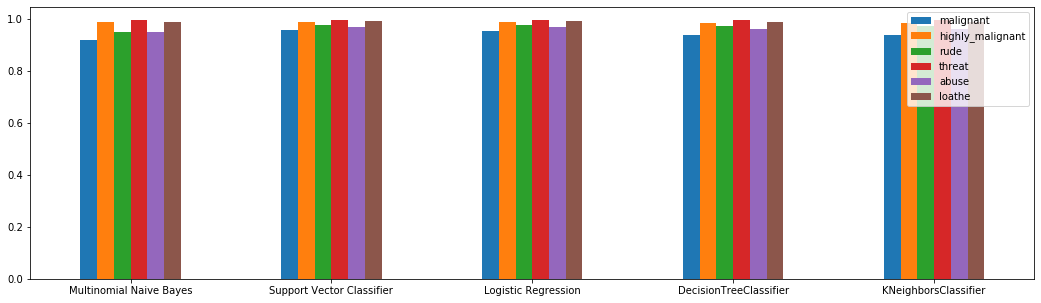

In [42]:
accuracy = pd.DataFrame(accuracy)
fig = accuracy.plot.bar(figsize=(18, 5))
plt.xticks(np.arange(5), ('Multinomial Naive Bayes','Support Vector Classifier','Logistic Regression', 'DecisionTreeClassifier', 'KNeighborsClassifier'), rotation=0)
plt.legend(y_labels)
plt.show

In [43]:
models = ['Multinomial Naive Bayes','Support Vector Classifier','Logistic Regression', 'DecisionTreeClassifier', 'KNeighborsClassifier']
for i in range(5):
  print(models[i], "- Aggregate Accuracy -", np.mean(accuracy.iloc[i,:]))

Multinomial Naive Bayes - Aggregate Accuracy - 0.9670743209454541
Support Vector Classifier - Aggregate Accuracy - 0.9817315178791849
Logistic Regression - Aggregate Accuracy - 0.9800508934844947
DecisionTreeClassifier - Aggregate Accuracy - 0.9750375054596555
KNeighborsClassifier - Aggregate Accuracy - 0.9749583800173444


In [44]:
from sklearn.model_selection import GridSearchCV

sv = LinearSVC(random_state=42)
sv_param={'C':[1,10], 'penalty':['l1','l2']}

b_sv=GridSearchCV(sv,sv_param)
for i in y_labels:
  b_sv.fit(x_train, train[i])
  print('Best Parameters for {0} is \n{1}\n'.format(i, b_sv.best_params_))

Best Parameters for malignant is 
{'C': 1, 'penalty': 'l2'}

Best Parameters for highly_malignant is 
{'C': 1, 'penalty': 'l2'}

Best Parameters for rude is 
{'C': 1, 'penalty': 'l2'}

Best Parameters for threat is 
{'C': 1, 'penalty': 'l2'}

Best Parameters for abuse is 
{'C': 1, 'penalty': 'l2'}

Best Parameters for loathe is 
{'C': 1, 'penalty': 'l2'}



In [45]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
sv = LinearSVC(C=1, random_state=42, penalty='l2')

predictions = {y_labels[0]:[], y_labels[1]:[], y_labels[2]:[], y_labels[3]:[], y_labels[4]:[], y_labels[5]:[]}
f1score, prediction_accuracy = [], []

for i in y_labels:
  sv.fit(x_train, train[i])
  y_pred = sv.predict(x_test)
  predictions[i].append(y_pred)
  print('>>>>>>>>', i, '<<<<<<<<')
  
  pred_acc = accuracy_score(test[i], y_pred)
  prediction_accuracy.append(pred_acc)
  print("Accuracy :: {0}%".format(round(pred_acc*100,2)))

  f1s = f1_score(test[i], y_pred)
  f1score.append(f1s)
  print("F1 Score :: {0}%".format(round(f1s*100,2)))
  print(confusion_matrix(test[i], y_pred), '\n')

>>>>>>>> malignant <<<<<<<<
Accuracy :: 96.02%
F1 Score :: 76.91%
[[47070   506]
 [ 1591  3492]] 

>>>>>>>> highly_malignant <<<<<<<<
Accuracy :: 99.06%
F1 Score :: 38.1%
[[52013   120]
 [  374   152]] 

>>>>>>>> rude <<<<<<<<
Accuracy :: 97.88%
F1 Score :: 77.83%
[[49579   249]
 [  869  1962]] 

>>>>>>>> threat <<<<<<<<
Accuracy :: 99.75%
F1 Score :: 38.32%
[[52486    21]
 [  111    41]] 

>>>>>>>> abuse <<<<<<<<
Accuracy :: 97.13%
F1 Score :: 67.02%
[[49615   401]
 [ 1109  1534]] 

>>>>>>>> loathe <<<<<<<<
Accuracy :: 99.2%
F1 Score :: 34.53%
[[52127    61]
 [  360   111]] 



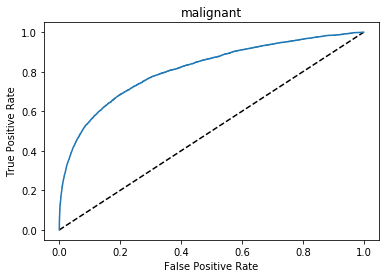

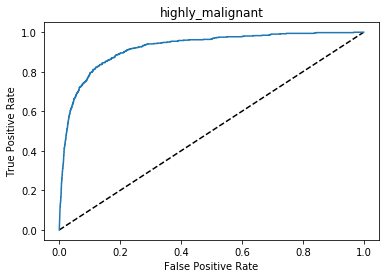

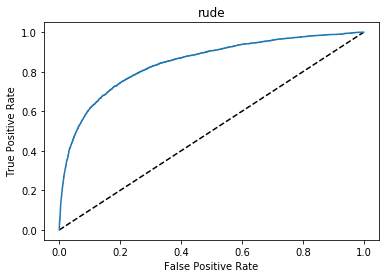

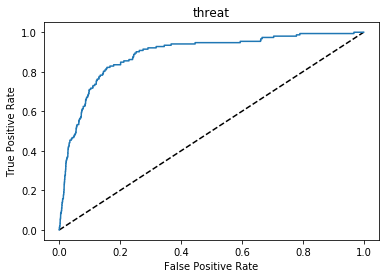

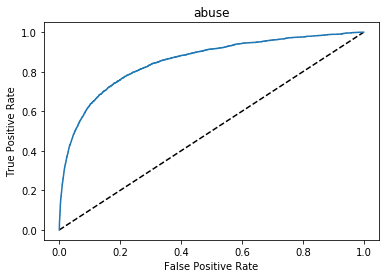

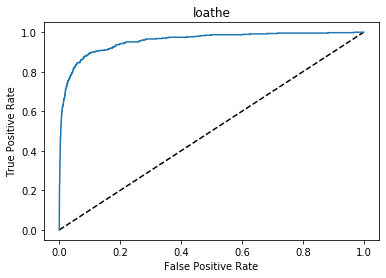

In [46]:
from sklearn.metrics import roc_curve
for i in y_labels:
  y_pred_prob = sv._predict_proba_lr(x_test)[:, 1]  #1 is the probabilty of threshold value
  fpr, tpr, thresholds=roc_curve(test[i], y_pred_prob)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr, tpr, label=i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(i)
  plt.show()

In [47]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [48]:
print('Before pre-processing ::\n', df_test['comment_text'][5])
clean_text(df_test, 'comment_text')
print('\nAfter pre-processing ::\n', df_test['comment_text'][5])

Before pre-processing ::
 Thank you for understanding. I think very highly of you and would not revert without discussion.

After pre-processing ::
 thank understanding think highly would revert without discussion


In [49]:
x_train = df['comment_text']
x_train = tf.fit_transform(cv.fit_transform(x_train))

y_train = df.drop(columns=['comment_text', 'id', 'non-unique', 'new_length'])

pred = df_test['comment_text']
pred = tf.transform(cv.transform(pred))

In [50]:
predictions = []
for j, i in enumerate(y_labels):
  sv.fit(x_train, y_train[i]) # fitting the model
  y_pred = sv.predict(pred).tolist() # np array of predictions to list
  predictions.append(y_pred)
  print(i, '---> Predicted ---', round((j+1)/6*100,2), '% Complete')

malignant ---> Predicted --- 16.67 % Complete
highly_malignant ---> Predicted --- 33.33 % Complete
rude ---> Predicted --- 50.0 % Complete
threat ---> Predicted --- 66.67 % Complete
abuse ---> Predicted --- 83.33 % Complete
loathe ---> Predicted --- 100.0 % Complete


In [51]:
test_result = pd.DataFrame({'id':df_test['id'], 'comment_text':df_test['comment_text'], 'malignant':predictions[0], 'highly_malignant':predictions[1], 'rude':predictions[2], 'threat':predictions[3], 'abuse':predictions[4], 'loathe':predictions[5]})
test_result

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,1,0,1,0,1,0
1,0000247867823ef7,rfc title fine imo,0,0,0,0,0,0
2,00013b17ad220c46,sources zawe ashton lapland,0,0,0,0,0,0
3,00017563c3f7919a,look back source information updated correct f...,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit articles,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,1,0,0,0,0,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,okinotorishima categories see changes agree co...,0,0,0,0,0,0
153162,fffe8f1340a79fc2,one founding nations eu germany law return qui...,0,0,0,0,0,0


In [52]:
# Export to csv
test_result.to_csv('submission.csv')